In [18]:
from datalake_indexes_demo import DatalakeIndexesDemo
import pandas as pd

demo = DatalakeIndexesDemo("/Users/jannisbecktepe/Developer/db_config.json",
                           "cafe_gittables2")

___

<h1 align="center" style=font-size:52px>Demonstration of MATE and COCOA </h1>
<h1 align="center" style=font-size:22px></h1>

___

<p align="center">
  <img src="datalake_indexes_qr.png" width=400px/>
</p>

___

___

# 1) Input Preparation

___

## Reading the input dataset

___

In [2]:
demo.read_input("../datasets/movie.csv", rows=200)

Shape: (200, 5)


,movie_title,duration,director_name,genres,imdb_score
0,Avatar,178.0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Pirates of the Caribbean: At World's End,169.0,Gore Verbinski,Action|Adventure|Fantasy,7.1
2,Spectre,148.0,Sam Mendes,Action|Adventure|Thriller,6.8
3,The Dark Knight Rises,164.0,Christopher Nolan,Action|Thriller,8.5
4,Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,Documentary,7.1


___

## Selecting the query columns for the joinability discovery

___

In [3]:
demo.set_query_columns(["movie_title", "director_name"])

,movie_title,duration,director_name,genres,imdb_score
0,Avatar,178.0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Pirates of the Caribbean: At World's End,169.0,Gore Verbinski,Action|Adventure|Fantasy,7.1
2,Spectre,148.0,Sam Mendes,Action|Adventure|Thriller,6.8
3,The Dark Knight Rises,164.0,Christopher Nolan,Action|Thriller,8.5
4,Star Wars: Episode VII - The Force Awakens,nan,Doug Walker,Documentary,7.1


___

## Select the target column for the downstream ML model

___

In [4]:
demo.set_target_column("imdb_score")

,movie_title,duration,director_name,genres,imdb_score
0,Avatar,178.0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Pirates of the Caribbean: At World's End,169.0,Gore Verbinski,Action|Adventure|Fantasy,7.1
2,Spectre,148.0,Sam Mendes,Action|Adventure|Thriller,6.8
3,The Dark Knight Rises,164.0,Christopher Nolan,Action|Thriller,8.5
4,Star Wars: Episode VII - The Force Awakens,nan,Doug Walker,Documentary,7.1


___

# 2) Joinability Discovery

___

## Finding the top-10 joinable tables using the Super Key Index and MATE

___

In [5]:
demo.joinability_discovery(verbose=True)

Preparing input dataset...
Done.
Fetching joinable tables based on first query column...
Done.
Running hash-based row filtering...


100%|█████████████████████████████████████| 500/500 [00:00<00:00, 508.67it/s]


Done.
Generating join maps...
Done.
--------------------------------------------
Runtime:
--------------------------------------------
Fetching candidate tables: 0.12s
MATE filtering:            0.87s
Fetching row values:       0.77s

--------------------------------------------
Statistics:
--------------------------------------------
Hash-based filtered rows:  15605
Hash-based approved rows:  781
Matching rows:             745
FP rows:                   36
Precision:                 0.954


___

## Inspecting the joinability scores for the retrieved joinable tables

___

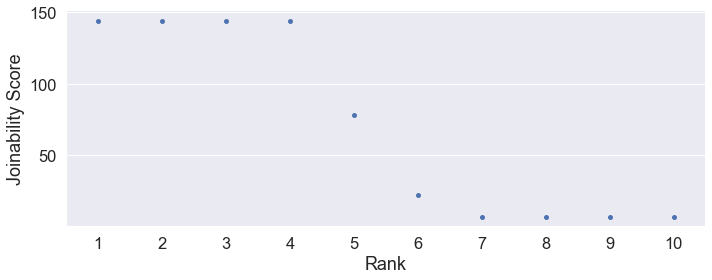

In [6]:
demo.plot_joinability_scores()

___

## Inspecting the joinable table with rank #1

___

In [7]:
demo.display_joinable_table(1)

Joinability score: 144 
Table ID: 21812 
#rows: 149 
#columns: 28 


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,color,james cameron,723 0,178 0,0,855 0,joel david moore,1000,760505847 0,action adventure fantasy sci fi,cch pounder,avatar,886204,4834,wes studi,0 0,avatar future marine native paraplegic,http www imdb com title tt0499549 ref fn tt tt 1,3054 0,english,usa,pg 13,237000000 0,2009 0,936,7 9,1 78,33000
1,color,gore verbinski,302 0,169 0,563,1000 0,orlando bloom,40000,309404152 0,action adventure fantasy,johnny depp,pirates caribbean world s end,471220,48350,jack davenport,0 0,goddess marriage ceremony marriage proposal pirate singapore,http www imdb com title tt0449088 ref fn tt tt 1,1238 0,english,usa,pg 13,300000000 0,2007 0,5000,7 1,2 35,0
2,color,sam mendes,602 0,148 0,0,161 0,rory kinnear,11000,200074175 0,action adventure thriller,christoph waltz,spectre,275868,11700,stephanie sigman,1 0,bomb espionage sequel spy terrorist,http www imdb com title tt2379713 ref fn tt tt 1,994 0,english,uk,pg 13,245000000 0,2015 0,393,6 8,2 35,85000
3,color,christopher nolan,813 0,164 0,22000,23000 0,christian bale,27000,448130642 0,action thriller,tom hardy,dark knight rises,1144337,106759,joseph gordon levitt,0 0,deception imprisonment lawlessness police officer terrorist plot,http www imdb com title tt1345836 ref fn tt tt 1,2701 0,english,usa,pg 13,250000000 0,2012 0,23000,8 5,2 35,164000
4,none,doug walker,nan,nan,131,nan,rob walker,131,nan,documentary,doug walker,star wars episode vii force awakens,8,143,none,0 0,none,http www imdb com title tt5289954 ref fn tt tt 1,nan,none,none,none,nan,nan,12,7 1,nan,0


___

# 3) Duplicate Detection using XASH

___

## Discovering duplicate tables and their relationship within the joinable tables
___

In [8]:
demo.duplicate_detection().show("nb.html")

___

## Removing duplicates within the top joinable tables

___

In [9]:
demo.remove_duplicates()

Reduced the number of joinable tables from 10 to 5.


___

# 4) Correlation Calculation

___

## Obtaining the top-10 correlating features using Order Index and COCOA Algorithm

___

In [10]:
demo.correlation_calculation()

100%|█████████████████████████████████████████| 5/5 [00:00<00:00, 279.66it/s]

--------------------------------------------
Runtime:
--------------------------------------------
Total runtime: 0.15s
Preparation runtime: 0.13s
Correlation calculation runtime: 0.02s

--------------------------------------------
Statistics:
--------------------------------------------
Evaluated features: 108
Max. correlation coefficient: 0.5165


___

## Inspecting the correlation coefficients for the retrieved features

___

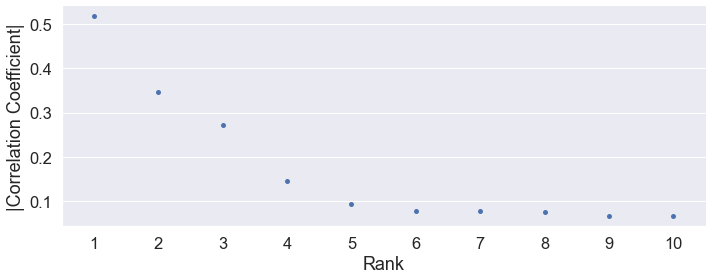

In [11]:
demo.plot_correlation_coefficients()

## Materializing join for the top 4 correlating features

In [12]:
demo.add_external_features(4)

,movie_title,duration,director_name,genres,imdb_score,21812_num_voted_users,21812_movie_facebook_likes,281512_Year,21812_actor_2_facebook_likes
0,Avatar,178.0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,7.9,886204,33000,2009,936
1,Pirates of the Caribbean: At World's End,169.0,Gore Verbinski,Action|Adventure|Fantasy,7.1,471220,0,2007,5000
2,Spectre,148.0,Sam Mendes,Action|Adventure|Thriller,6.8,275868,85000,nan,393
3,The Dark Knight Rises,164.0,Christopher Nolan,Action|Thriller,8.5,1144337,164000,2012,23000
4,Star Wars: Episode VII - The Force Awakens,nan,Doug Walker,Documentary,7.1,8,0,nan,12


## Inspect differences between Spearman and Pearson correlation coefficients

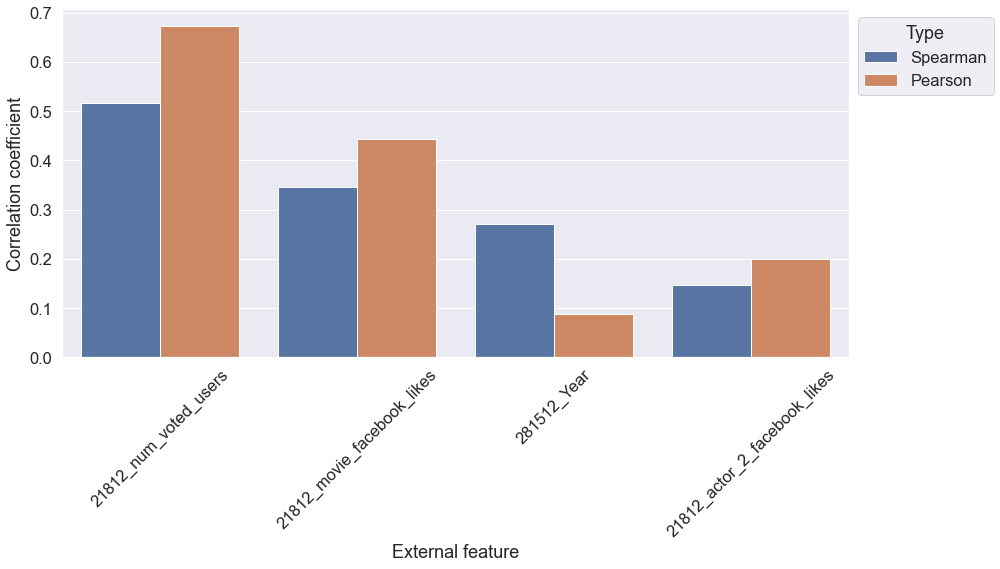

In [13]:
demo.plot_spearman_pearson()

## Inspect correlation between input and top-correlating features

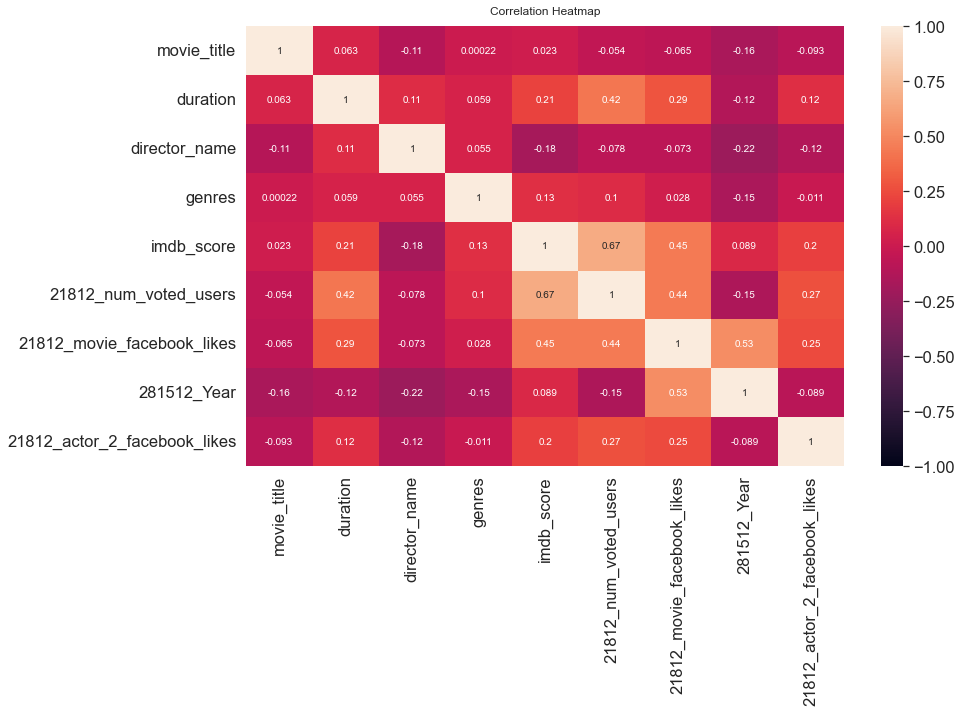

In [14]:
demo.plot_correlation_heatmap()

## Compare MSE of the model for the input and enriched datasets

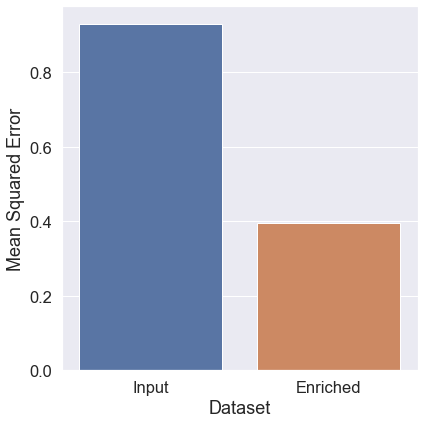

In [15]:
demo.fit_and_evaluate_model()